# Gaussian Regression via Monte Carlo Sampling  
## Abstract  
Gaussian Distribution is a probability distribution with a wide range of applications, and therefore, appears inumerous times in many scenarios, from the most basic statistical problems even to applied scenarios, such as in the context of ultrafast optics laboratory.  
In this work, I present an alternative way to determine the regression function for any curve that resembles a gaussian curve using Monte Carlo Sampling Method.

## 1. Introduction  
A Gaussian curve is formally defined as a normalized frequency distribution that is symmetrical about the line of zero error and in which the frequency and magnitude of quantities are related by the expression $f(x)=\frac1{\sigma\sqrt{2\pi}}e^{-\frac1{2}(\frac{x-\mu}{\sigma})^2} (1.1)$   
### 1.1. Context of Development  
This project arose from the need to perform perliminary calculations in a ultrafast optics experiment. This experiment consisted in studying the dynamics of longitudinal modes of a ultrafast pulsed laser through a Fabry-Perot interferometer, however, due to the superposition of such modes the reading the interferometer was unable to give a precise reading. To correct this problem I needed to reduce the ammount of modes that went into the aforementioned instrument via filtration through an interference filter.
The spectrum of the laser before and after the filtrationg presented no apparent change, however, if enough filtrations were made, its width should be reduced. 3 sequential filtrations were performed.  
Comparing the graphics of the spectrum before and after the filtrations showed no apparent change in it's size, however a regression needed to be performed to correctly assess this claim.  
Both spectrums presented themselves with a Gaussian form, which gave rise for the development of this method.  
### 1.2. Monte Carlo Sampling  
Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.  
Monte Carlo methods vary, but tend to follow a particular pattern:  

   1. Define a domain of possible inputs
   2. Generate inputs randomly from a probability distribution over the domain
   3. Perform a deterministic computation on the inputs
   4. Aggregate the results  

## 2. Methodology  
### 2.1. Theoretical Approach
### 2.1.1. Mathematical description of the Problem  
We are presented with the following function:
$$ \begin{matrix} I: & \Lambda \to \mathbb{R} \\ & \lambda\mapsto I(\lambda) \end{matrix} $$  
known as Intensity function, where $I(\lambda) \sim N(\mu,\sigma)$.  
$I(\lambda)$ can be transformed into a probability distribution $p(\lambda)$ via simple normalization, i.e., $\int\limits_\Lambda p(\lambda)d\lambda=1$.  
We define $C=\int\limits_\Lambda I(\lambda)d\lambda (2.1)$  which is the normalization factor. This factor allows us to normalize the intensity function to transform it into a probability distribution by the following process:$$p(\lambda)=\frac{I(\lambda)}{C}=\frac{I(\lambda)}{\int\limits_\Lambda I(\lambda) d\lambda} (2.2)$$  
It is important to note that we are dealing with experimental results, therefore we must take into consideration one factor, that the set of $\lambda$ ,i.e., $\Lambda$ is not a continuous set, rather a discrete set of wavelenghts that the instrument reads, so one alteration must be made to equation (2.2):  
$$p(\lambda)=\frac{I(\lambda)}{C}=\frac{I(\lambda)}{\sum\limits_\Lambda I(\lambda)} (2.3)$$
#### 2.1.2. Sampling  
Given our normalized distribution $p(\lambda)$, we draw $m$ samples is of size $n$, $\Lambda_i=\{\lambda_1,...\lambda_n\}$, $\forall \lambda_j\in\Lambda$. Recall that $\Lambda$ is the set of available wavelenghts that the instrument detects, and therefore the domain upon which we will conduct our sampling and analysis.  
For each sample $\Lambda_i$ we calculate it's average value as well as its, sample standard deviation, i.e., we extract the following matrix:
$$ D(n,m)=\begin{pmatrix} 
    \bar{\Lambda}_1(n) & s_{\Lambda_1}(n) \\
    \vdots & \vdots \\
    \bar{\Lambda}_i(n) & s_{\Lambda_i}(n) \\
    \vdots & \vdots \\
    \bar{\Lambda}_m(n) & s_{\Lambda_m}(n)
    \end{pmatrix}$$  
Where $\bar{\Lambda}_i$ is the average value of $\Lambda_i$, $s_{\Lambda_i}$ is the sample standard deviation of $\Lambda_i$ and $D(n,m)$ is the data matrix.  
Recall that what we are trying to accomplish is a regression for a gaussian curve, at this point we already have data for $m$ regressions. Thew next step will reinforce the precision of the regression by application of central limit theorem.  
### 2.1.3. Application of Central Limit Theorem  
#### 2.1.3.1. Central Limit Theorem  
Let $\{ X_1,...X_n\}$ be a random sample of size $n$, that is, a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value given by $\mu$ and finite variance given by $\sigma$. Suppose we are interested in the sample average  
$$\bar{X}\equiv \frac{X_1+...+X_n}{n}$$  
of these random variables. By the law of large numbers, the sample averages converge almost surely (and therefore also converge in probability) to the expected value $\mu$ as $n\to \infty$. The classical central limit theorem describes the size and the distributional form of the stochastic fluctuations around the deterministic number $\mu$  during this convergence. More precisely, it states that as $n$ gets larger, the distribution of the difference between the sample average $\bar{X}_n$ and its limit $\mu$ when multiplied by the factor $\sqrt{n}$ (that is, $\sqrt{n}(\bar{X}_n-\mu)$) approximates the normal distribution with mean 0 and variance $\sigma^2$. For large enough $n$ the distribution of $\bar{X}_n$ is close to the normal distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$.  
#### 2.1.3.2. Central Limit Theorem Application to this Work
In this work we intend to determine the average value $\mu$ and standard deviation $\sigma$ of the original distribution, so we will apply the CLT to both the sample average as well as sample standard deviation. However, since we are employing Monte Carlo sampling, we can generate many samples of size $n$, that is, $\Lambda_m(n)$ as well as it's corresponding sample standard deviations $s_{\Lambda_m}(n)$. By taking the CLT further, we can apply it to the average value of average values defined as  
$$\bar{\Lambda}(n,m)=\frac{\sum_1^m \bar{\Lambda_i}(n)}{m}$$  
and average value of sample standard deviations as  
$$\bar{S_\Lambda}(n,m)=\frac{\sum_1^m s_{\Lambda_i}(n)}{m}$$  
### 2.1.4. Statistical inference on $\mu$ and $\sigma$  
At this point we have the average value of average values $\bar{\Lambda}(n,m)$ and the average value of sample standard deviation $\bar{S}_\Lambda(n,m)$.  
Now all that remains is to calculate the confidence interval for these values.  
Suppose $\{\bar{\Lambda}_1,...,\bar{\Lambda}_m\}$ is an independent sample from a normally distributed population with unknown (parameters) mean $\mu$ and variance $\sigma^2$. Let  
$$\bar{\Lambda}=\frac{\sum_1^m \bar{\Lambda}_i}{m}$$  
$$\bar{S_\Lambda}=\frac{\sum_1^m s_{\Lambda_i}}{m}$$  
and  
$$S_\bar{\Lambda}^2=\frac{1}{m-1}\sum_1^m(\Lambda_i-\bar{\Lambda})$$
$$S_\bar{S_\Lambda}^2=\frac{1}{m-1}\sum_1^m(s_{\Lambda_i}-\bar{S_\Lambda})$$  
Where $\bar{\Lambda}$, $\bar{S_\Lambda}$ are the sample means for average value and standard deviation respectively, and $S_\bar{\Lambda}^2$, $S_\bar{S_\Lambda}^2$ are the sample variances for the average value and standard deviation respectively. Recall that we are calculating two confidence intervalls, for the average value as well as for the standard deviation of the original distribution! Then,  
$$T_\bar{\Lambda}=\frac{\bar{\Lambda}-\mu}{\bar{S_\bar{\Lambda}}/\sqrt{m}}$$  
$$T_\bar{S_\Lambda}=\frac{\bar{S_\Lambda}-\sigma}{S_\bar{S_\Lambda}/\sqrt{m}}$$  
have Student's t distribution with $n-$ degrees of freedom. Suppose we wanted to calculate a 95% confidence interval for $\mu$ and $\sigma$. Then, denoting $c$ as as the 97.5th percentile of this distribution,  
$$Pr(-c\leq T_\bar{\Lambda}\leq+c)=0.95$$  
and  
$$Pr(-c\leq T_\bar{S_\Lambda}\leq+c)=0.95$$  
Note that "97.5th" and "0.95" are correct in the preceding expressions. There is a 2.5% chance that $T_\bar{\Lambda}$ and $T_\bar{S_\Lambda}$ will be less than $-c$ and a 2.5% chance that it will be larger than $+c$ Thus, the probability that $T_\bar{\Lambda}$ and $T_\bar{S_\Lambda}$ will be between $-c$ and $+c$ is 95%.  
Consequently,  
$$Pr \bigg(\bar{\Lambda}-\frac{cS_\bar{\Lambda}}{\sqrt{m}}\leq \mu \leq \bar{\Lambda}+\frac{cS_\bar{\Lambda}}{\sqrt{m}}\bigg)$$  
$$Pr \bigg(\bar{S_\Lambda}-\frac{cS_\bar{S_\Lambda}}{\sqrt{m}}\leq \sigma \leq \bar{S_\Lambda}+\frac{cS_\bar{S_\Lambda}}{\sqrt{m}}\bigg)$$  
and we have theoretical (stochastic) 95% confidence intervals for $\mu$ and $\sigma$.  
### 2.2. The Algorithm  
The algorithm is presented in 4 stages:  
1. Data importation,  
2. Analysis of the data,  
3. Implementation of the method described in 2.1,  
4. Verification of the results.  

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
import math as m
sns.set()

In [2]:
path=r'C:\Users\Mykola\Desktop\Data Science\Projects\Gaussian_regression_via_monte_carlo_sampling\shg_excel.xlsx'
data=pd.read_excel(path)
print(data.shape)
data.head()

(238, 2)


,wavelenght,intensity
0,397.58,0.001755
1,397.84,0.000875
2,398.11,0.001167
3,398.37,0.001602
4,398.63,0.002329


Text(0, 0.5, 'intensity')

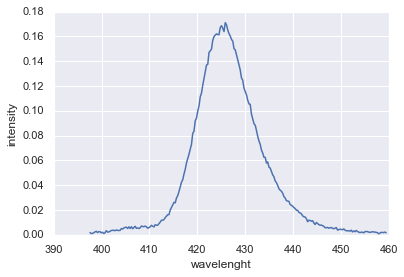

In [3]:
plt.plot(data.wavelenght,data.intensity);
plt.xlabel('wavelenght')
plt.ylabel('intensity')

The dataframe contains 2 columns, wavelenght and intensity, and has 238 occurences, in other words our $\Lambda$ contains 238 elements.  
Nest step is to preform the normalization to transform this data into probabilistic data.

,wavelenght,prob
0,397.58,0.000179
1,397.84,0.000089
2,398.11,0.000119
3,398.37,0.000163
4,398.63,0.000237


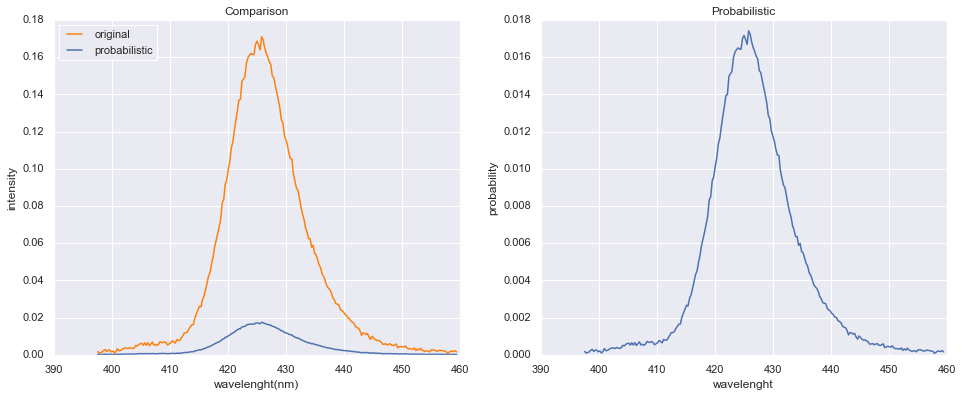

In [4]:
#normalization
C=data.intensity.sum()
data['prob']=abs(data.intensity/C)
#plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.plot(data.wavelenght,data.intensity,'tab:orange',label='original')
ax1.plot(data.wavelenght,data.prob,label='probabilistic')
ax1.set_xlabel('wavelenght(nm)')
ax1.set_ylabel('intensity')
ax1.legend(loc='upper left')
ax1.set_title('Comparison')
ax2.plot(data.wavelenght,data.prob)
ax2.set_title('Probabilistic')
ax2.set_xlabel('wavelenght')
ax2.set_ylabel('probability')
#probabilistic dataframe
probabilistic_data=data[['wavelenght','prob']]
probabilistic_data.head()

Now, the data normalized, and, therefore, a probability distrubution is obtained that follows a gaussian curve.  
Follows the function to create each $\Lambda_i$:

In [5]:
#random sample from distribution
def sample(n):
    s=np.random.choice(probabilistic_data.wavelenght,n,p=probabilistic_data.prob)
    values=np.zeros(2)
    values[0]=np.average(s)
    values[1]=np.std(s)
    return values

The following function performs the rest of the method. The inputs are:  
- n - size of each sample;
- m - ammount of samples;
- confidence_interval - the confidence interval of your parameters estimation.  
  
All these three inputs control the precision of the estimation and, therefore, of the gaussian regression itself.

In [6]:
#Sampling of the average values and std from previous function
def re_sample(n,m,confidence_interval):
    s2_average=np.zeros(m)
    s2_std=np.zeros(m)
    i=0
    while i<m:
        s2_average[i]=sample(n)[0]
        s2_std[i]=sample(n)[1]
        i+=1
    mc_ave_average=np.average(s2_average) #average of the average
    mc_std_average=np.std(s2_average) #average's std
    mc_ave_std=np.average(s2_std) #average std
    mc_std_std=np.std(s2_std) #std of std
    results=(mc_ave_average,mc_std_average,mc_ave_std,mc_std_std)
    ci_ave_low=mc_ave_average-mc_ave_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_ave_high=mc_ave_average+mc_ave_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_std_low=mc_ave_std-mc_std_std*t.ppf((1+confidence_interval)/2,m-1)
    ci_std_high=mc_ave_std+mc_std_std*t.ppf((1+confidence_interval)/2,m-1)
    
    results = {'quantity':['value','value´s std','value´s std %','value´s low confidence interval','value´s high confidence interval'],
              'average':[mc_ave_average,mc_std_average,(mc_std_average/mc_ave_average)*100,ci_ave_low,ci_ave_high],
              'std':[mc_ave_std,mc_std_std,(mc_std_std/mc_ave_std)*100,ci_std_low,ci_std_high]}
    results_2=pd.DataFrame(data=results)
    
    return results_2

In [7]:
results=re_sample(100000,100000,0.95)

In [8]:
results

,quantity,average,std
0,value,426.685154,7.720716
1,value´s std,0.024391,0.023802
2,value´s std %,0.005716,0.308287
3,value´s low confidence interval,411.552645,7.674064
4,value´s high confidence interval,441.817662,7.767367


The values and the corresponding uncertainties for average value and the standard deviation of the original distribution are here displayed.  
It shows that the method is capable of high precision with ness than 1% uncertainty in the average value and standard deviation.

## 3. Results  
The next part of the code compares the actual curve against the one sampled by this method.

In [37]:
test_data=probabilistic_data[['wavelenght','prob']]
test_data['sampling_prob']=norm.pdf(test_data['wavelenght'], loc=results.iloc[0]['average'], scale=results.iloc[3]['std'])

test_data['sampling_prob']=test_data['sampling_prob']/test_data.sampling_prob.sum()

test_data['difference']=abs((test_data['prob']-test_data['sampling_prob'])/test_data.prob)*100

In [40]:
test_data.head()

,wavelenght,prob,sampling_prob,difference
0,397.58,0.000179,0.000010,94.279307
1,397.84,0.000089,0.000012,86.963979
2,398.11,0.000119,0.000013,88.847388
3,398.37,0.000163,0.000015,90.791343
4,398.63,0.000237,0.000017,92.825302


In [39]:
test_data['difference'].describe()

count    238.000000
mean      49.582296
std       36.269506
min        0.075463
25%       19.355463
50%       37.867283
75%       79.553452
max      161.075564
Name: difference, dtype: float64

An average deviation of 49.58% from the actual curve is observed. This might be explained by the fact that the curve is a result of laboratorial measurements and so does not follow strictly a gaussian curve, only in approximation.

Text(0.5, 1.0, 'Comparison')

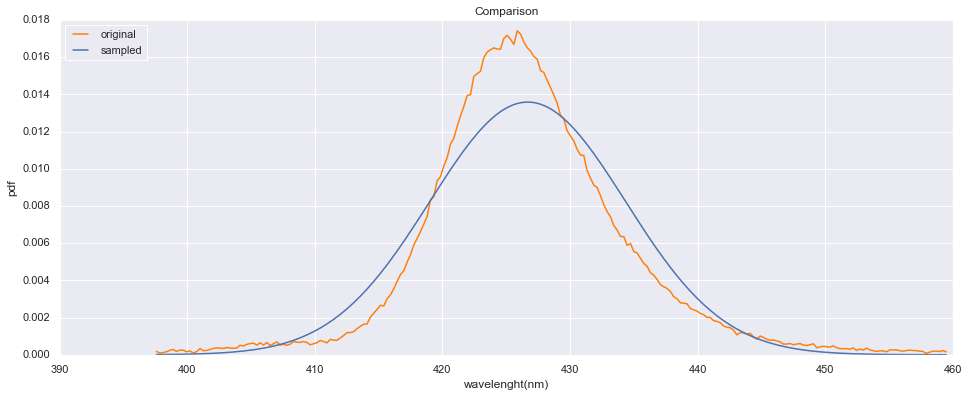

In [12]:
fig, ax1 = plt.subplots(1,1,figsize=(16,6))
ax1.plot(test_data.wavelenght,test_data.prob,'tab:orange',label='original')
ax1.plot(test_data.wavelenght,test_data.sampling_prob,label='sampled')
ax1.set_xlabel('wavelenght(nm)')
ax1.set_ylabel('pdf')
ax1.legend(loc='upper left')
ax1.set_title('Comparison')

Although the curve does not follow strictly a gaussian curve, the resulted sampling curve is a fairly good approximation.

## 4. Conclusion  
The method here developed, shows that it is possible to create a gaussian regression via Monte Carlo Sampling.  
Conclusions taken from this work:  
- The initial curve does not strictly follow a gaussian curve, due to being a result of laboratorial measurement, therefore possesses imperfections, resulting in lower precision;  
- This method allows for 3 precision control steps: the size of samples, the amount of samples and the confidence interval;  
- Has application to any curve that displays a gaussian shape, with precision being dependent on how well the data follows a gaussian curve.